In [60]:

#Data structures and operations for manipulating numerical tables and time series
import pandas as pd
#To carry adding support for large, multi-dimensional arrays and matrices
import numpy as np
#visualization tool
import matplotlib.pyplot as plt
#visualization tool
import seaborn as sns
#Useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program
import warnings 
warnings.filterwarnings('ignore')
#how to treat data, cleaning suggestion
#from autoviz.classify_method import data_cleaning_suggestions
#To sepreate training data and test data
from sklearn. model_selection import train_test_split, GridSearchCV
#To balance Data
from imblearn.over_sampling import SMOTE
#import imblearn
from imblearn import under_sampling, over_sampling
#Model Training
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
#Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost as xgb
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df=pd.read_excel('default of credit card clients.xls',header=1)

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#check Missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [11]:
#Rename default column 
df=df.rename(columns={'default payment next month':'DEFAULT'})

In [12]:
#Drop marriage columns as it is not specified
df=df[df['MARRIAGE'] != 0]
df =df.reset_index(drop=True)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Correlation Plot

<AxesSubplot:>

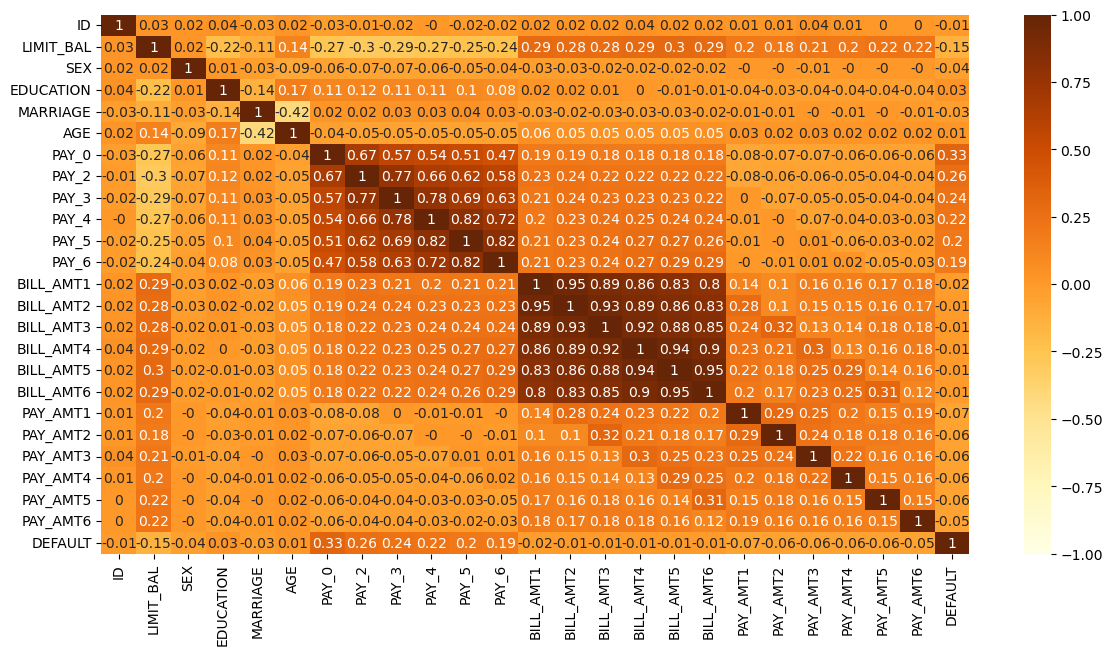

In [14]:
fig, ax = plt.subplots(figsize = (14,7))
corr = df.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='YlOrBr')

Apply PCA to reduce dimensionality of data for highly correlated variable (BILL_AMT)

In [19]:
from sklearn.decomposition import PCA
pca =PCA(n_components=3)
pca_col=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pca_features=pca.fit_transform(df[pca_col])
pca_df=pd.DataFrame(data=pca_features,columns=['PC1','PC2','PC3'])
pca_df

,PC1,PC2,PC3
0,-107402.351395,1829.455358,-176.138564
1,-103973.725753,-3335.699307,878.795717
2,-68987.687776,2601.886613,-7453.462443
3,-14888.002559,11321.067548,4989.003081
4,-66890.429559,-15898.129382,17830.501000
...,...,...,...
29941,200681.965297,148423.532876,72983.136023
29942,-102261.290642,-4431.353303,4604.423748
29943,-83800.081007,-22833.493335,-3925.795774
29944,-1476.137993,-10494.322232,47411.894888


In [20]:
df=df.drop(columns=pca_col,axis=1)
df=pd.concat([df,pca_df],axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PC1,PC2,PC3
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-107402.351395,1829.455358,-176.138564
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,-103973.725753,-3335.699307,878.795717
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,-68987.687776,2601.886613,-7453.462443
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,-14888.002559,11321.067548,4989.003081
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-66890.429559,-15898.129382,17830.501000


Correlation Plot after PCA


<AxesSubplot:>

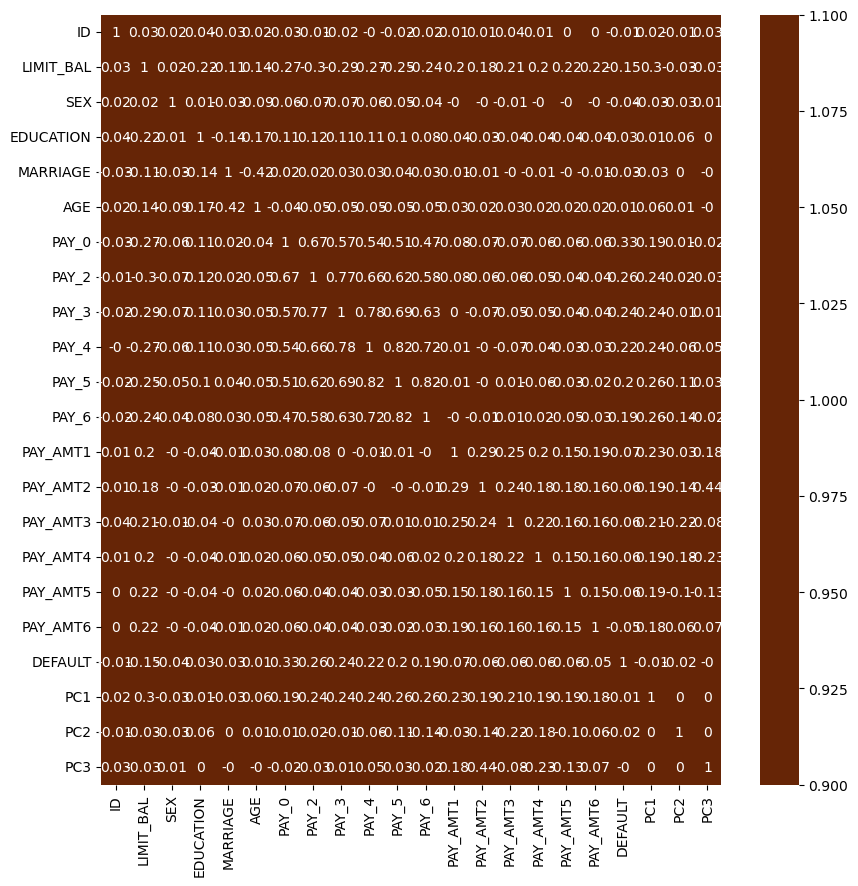

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
corr=df.corr().round(2)
sns.heatmap(corr,annot=True,ax=ax,vmin=1,vmax=1,center=0,cmap='YlOrBr')

Visualize Predictor variable

<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

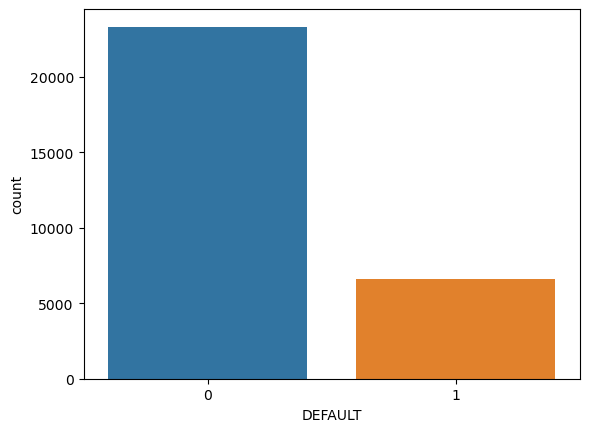

In [24]:
sns.countplot(x='DEFAULT',data=df)

Univariate analysis for categorical variables

In [25]:
cat_col = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
num_col = df[['AGE', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PC1', 'PC2', 'PC3']]

df1 = df
df1 = df1.drop(columns=['ID','DEFAULT', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

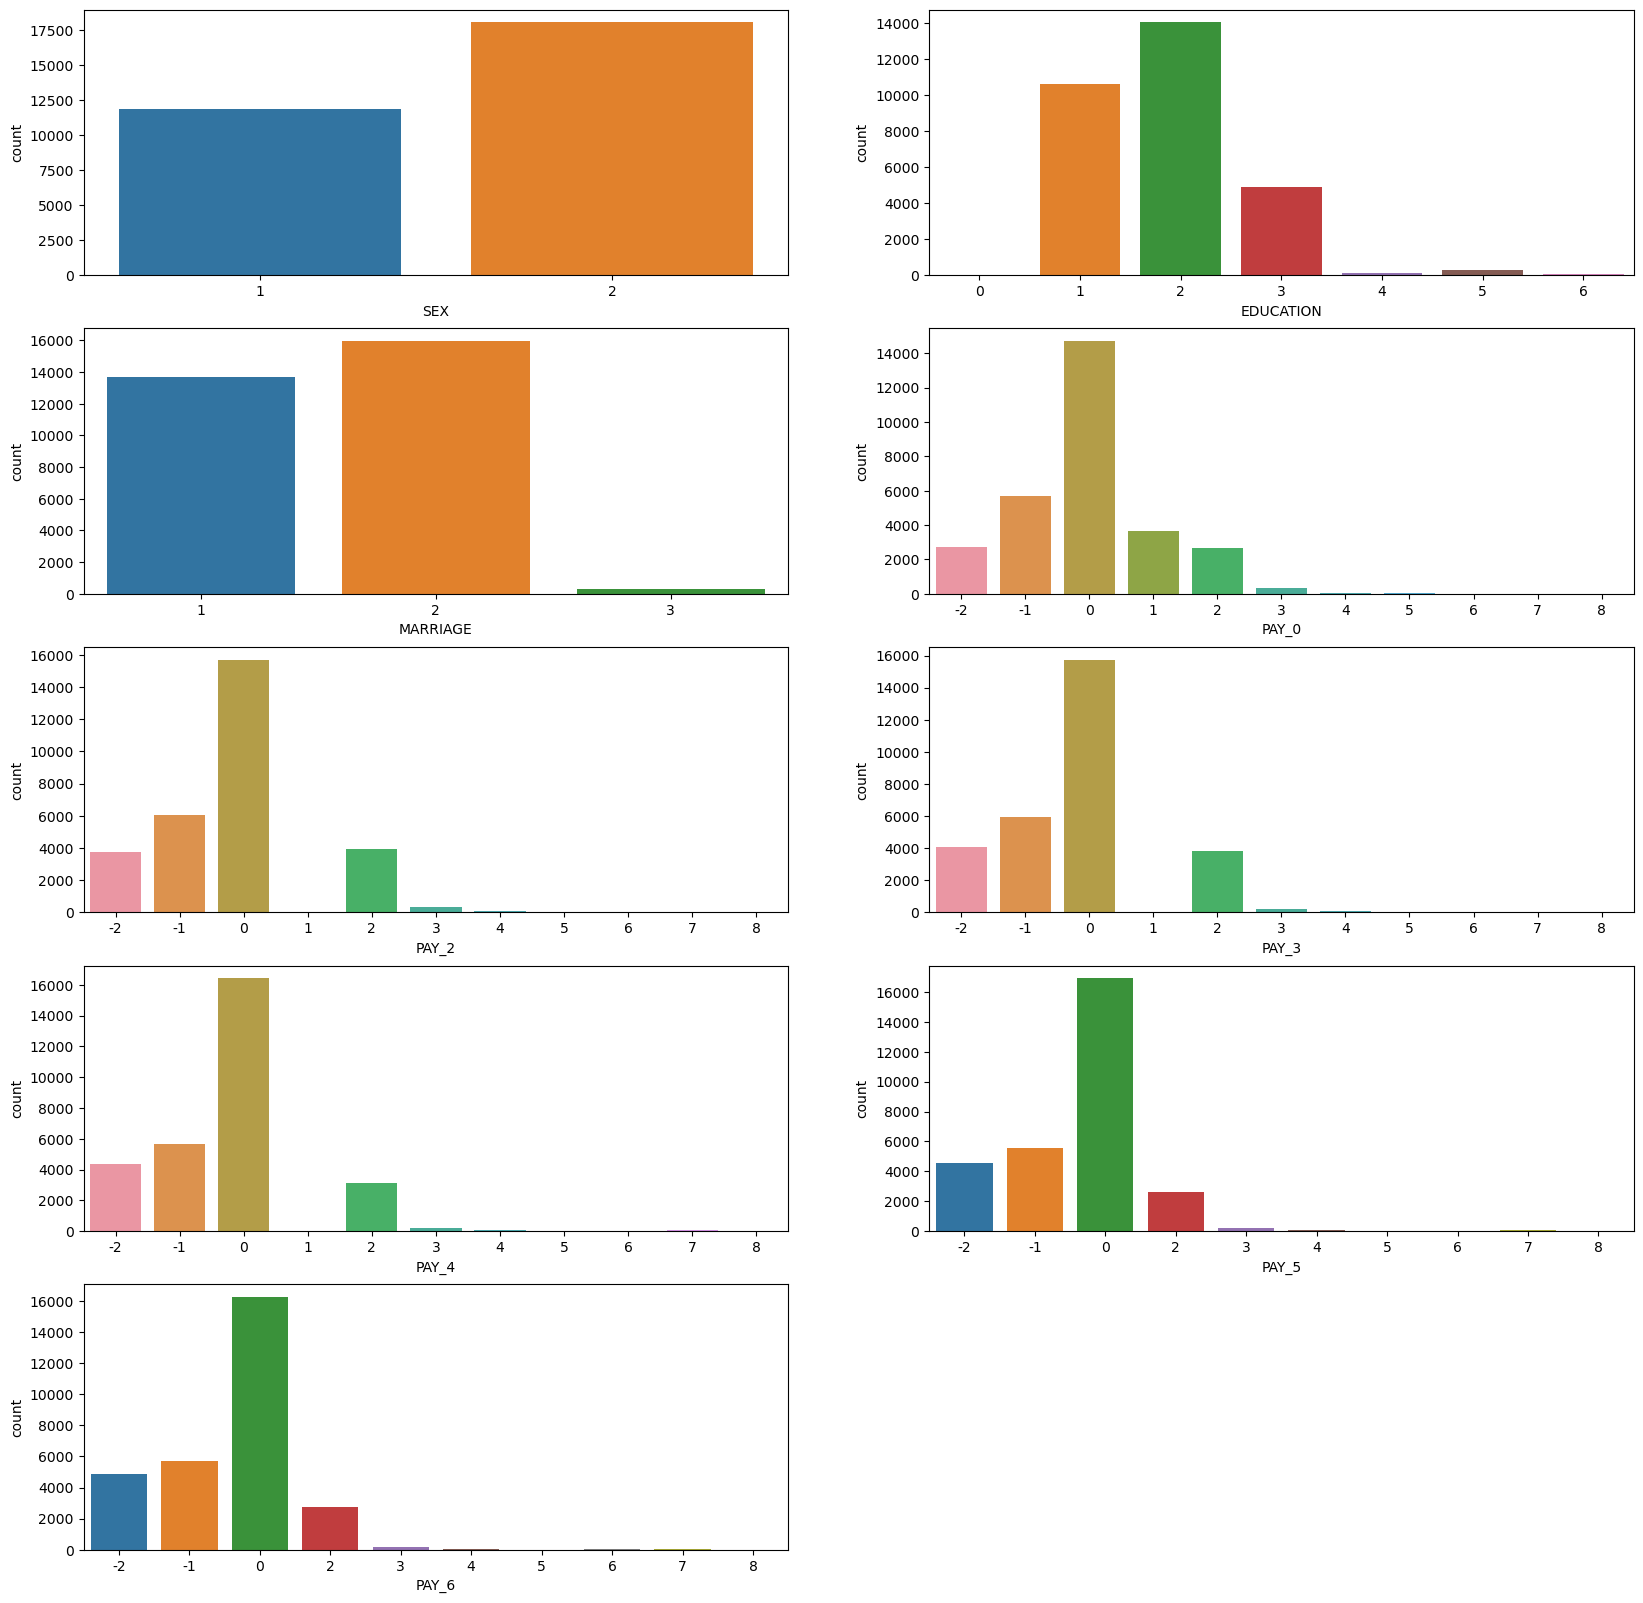

In [28]:
plt.figure(figsize=(20,20))

for i, col in enumerate(cat_col):
    plt.subplot(5, 2, i+1)
    sns.countplot(x= col, data=cat_col)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         29946 non-null  int64  
 1   LIMIT_BAL  29946 non-null  int64  
 2   SEX        29946 non-null  int64  
 3   EDUCATION  29946 non-null  int64  
 4   MARRIAGE   29946 non-null  int64  
 5   AGE        29946 non-null  int64  
 6   PAY_0      29946 non-null  int64  
 7   PAY_2      29946 non-null  int64  
 8   PAY_3      29946 non-null  int64  
 9   PAY_4      29946 non-null  int64  
 10  PAY_5      29946 non-null  int64  
 11  PAY_6      29946 non-null  int64  
 12  PAY_AMT1   29946 non-null  int64  
 13  PAY_AMT2   29946 non-null  int64  
 14  PAY_AMT3   29946 non-null  int64  
 15  PAY_AMT4   29946 non-null  int64  
 16  PAY_AMT5   29946 non-null  int64  
 17  PAY_AMT6   29946 non-null  int64  
 18  DEFAULT    29946 non-null  int64  
 19  PC1        29946 non-null  float64
 20  PC2   

Univariate analysis for numerical variable

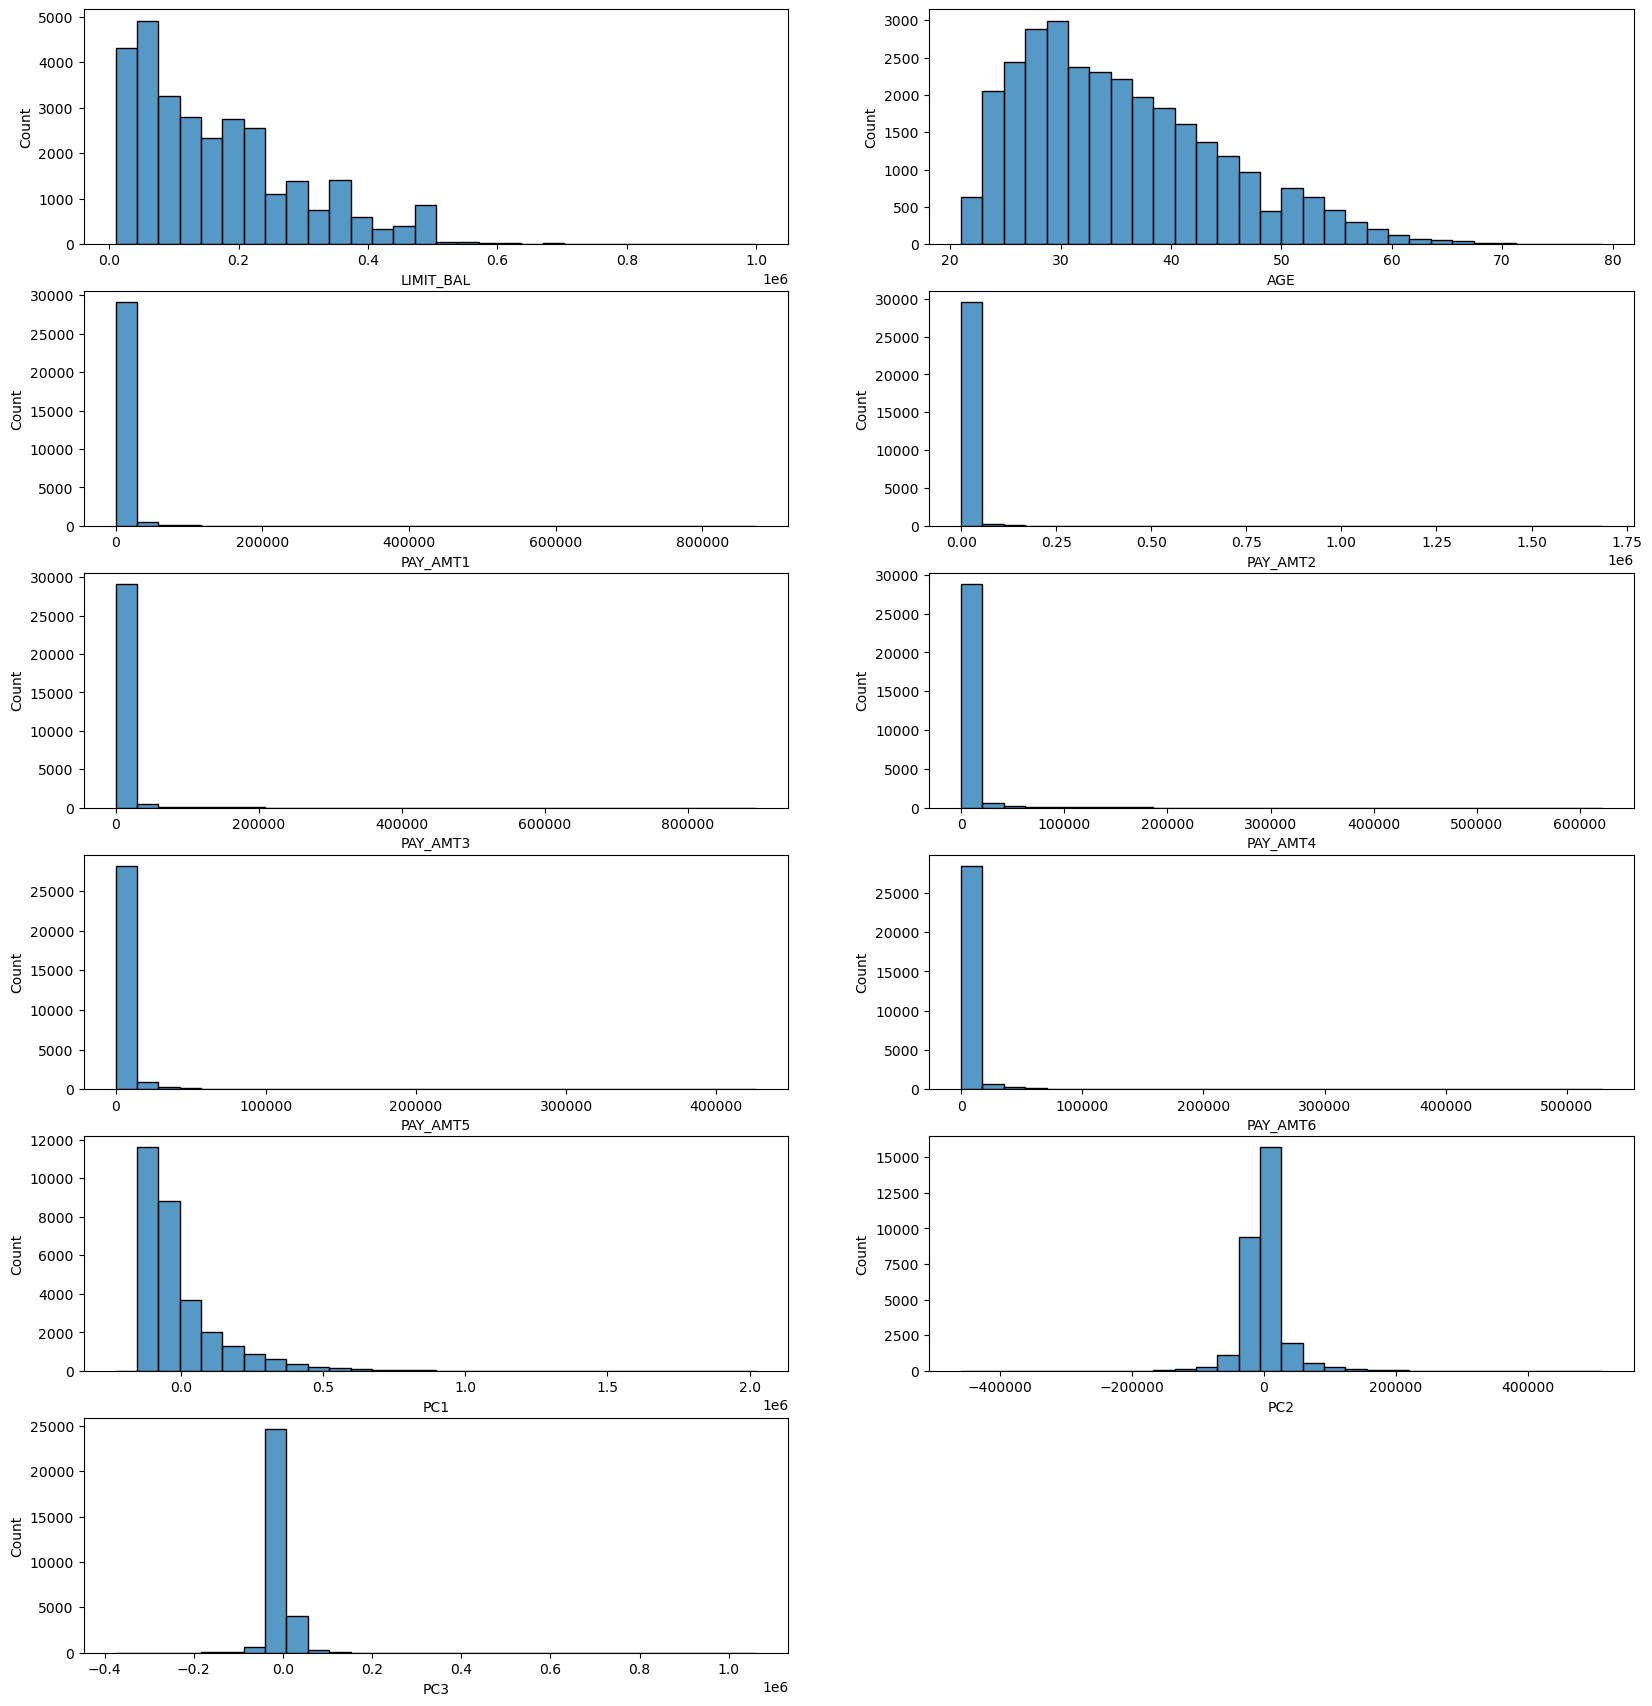

In [30]:
plt.figure(figsize=(20,25))

for i, col in enumerate(df1):
    plt.subplot(7, 2, i+1)
    sns.histplot(x= col, data=df1, bins=30)

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,29946.0,1.499914e+04,8659.571030,1.000000,7499.250000,14997.500000,22495.750000,3.000000e+04
LIMIT_BAL,29946.0,1.675466e+05,129807.831678,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,29946.0,1.603486e+00,0.489182,1.000000,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,29946.0,1.851533e+00,0.789773,0.000000,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,29946.0,1.554665e+00,0.518259,1.000000,1.000000,2.000000,2.000000,3.000000e+00
AGE,29946.0,3.548130e+01,9.218413,21.000000,28.000000,34.000000,41.000000,7.900000e+01
PAY_0,29946.0,-1.642957e-02,1.123467,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,29946.0,-1.336406e-01,1.196968,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,29946.0,-1.661324e-01,1.196428,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,29946.0,-2.203967e-01,1.168882,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00


<AxesSubplot:>

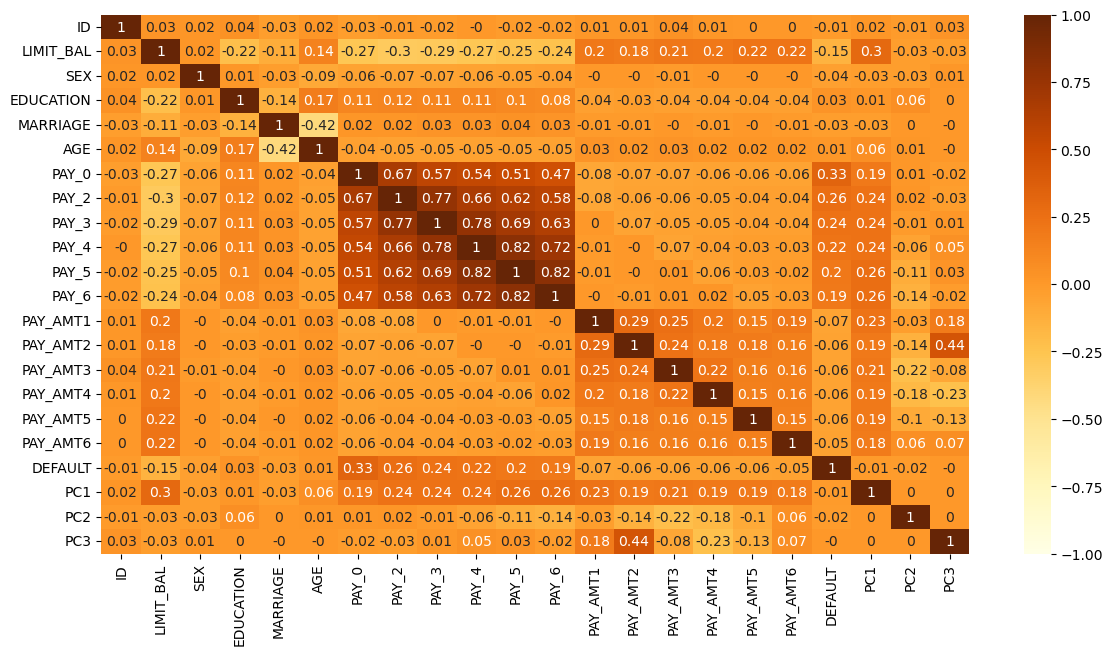

In [32]:
fig, ax = plt.subplots(figsize = (14,7))
corr = df.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='YlOrBr')

In [33]:
# Define independent and dependent variabels

Y = df['DEFAULT']
X = df.drop(['ID', 'DEFAULT'], axis=1)

Cross Balancing

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X, Y = ros.fit_resample(X, Y)

<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

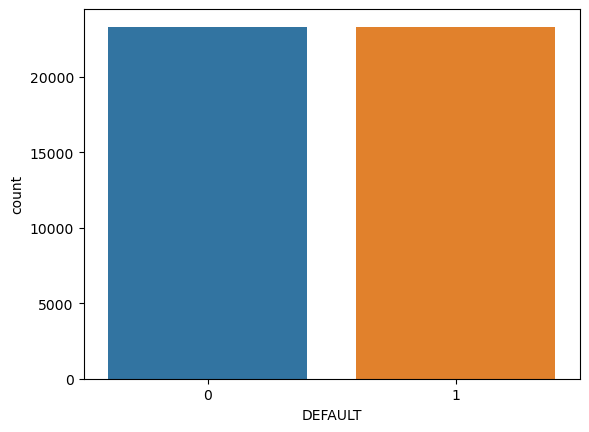

In [36]:
sns.countplot(x=Y)

In [38]:
# Normalizing numeric columns
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_col = pd.DataFrame(sc.fit_transform(num_col), columns=num_col.columns)

num_col

,AGE,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PC1,PC2,PC3
0,-1.245496,-1.136673,-0.341929,-0.227141,-0.296731,-0.308060,-0.314198,-0.293454,-0.690136,0.050037,-0.007803
1,-1.028535,-0.366290,-0.341929,-0.213654,-0.239971,-0.244274,-0.314198,-0.181038,-0.668105,-0.091235,0.038929
2,-0.160692,-0.597405,-0.250220,-0.191971,-0.239971,-0.244274,-0.248797,-0.012415,-0.443295,0.071164,-0.330171
3,0.164749,-0.905558,-0.221101,-0.169465,-0.228619,-0.237896,-0.244285,-0.237246,-0.095666,0.309642,0.221001
4,2.334356,-0.905558,-0.221101,1.333668,0.270866,0.266010,-0.269137,-0.255289,-0.429818,-0.434830,0.789850
...,...,...,...,...,...,...,...,...,...,...,...
29941,0.381710,0.404092,0.171593,0.610289,-0.012762,-0.113705,0.012805,-0.237246,1.289524,4.059531,3.232984
29942,0.815631,-0.135176,-0.230948,-0.104113,0.213993,-0.299831,-0.314198,-0.293454,-0.657101,-0.121202,0.203965
29943,0.164749,-1.059635,-0.341929,-0.257019,0.951982,-0.040160,-0.183397,-0.119210,-0.538475,-0.624519,-0.173904
29944,0.598671,-0.674443,4.847661,-0.109187,-0.229868,-0.185209,3.149675,-0.192055,-0.009485,-0.287030,2.100237


In [39]:
# One hot encoding for categorical columns
cat_col_list = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

X_dummy = pd.get_dummies(X, columns = cat_col_list)

X_dummy

,LIMIT_BAL,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PC1,PC2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,0,689,0,0,0,0,-107402.351395,1829.455358,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,0,1000,1000,1000,0,2000,-103973.725753,-3335.699307,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,1518,1500,1000,1000,1000,5000,-68987.687776,2601.886613,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,2000,2019,1200,1100,1069,1000,-14888.002559,11321.067548,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,2000,36681,10000,9000,689,679,-66890.429559,-15898.129382,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46625,90000,24,6600,0,2915,3154,2977,90000,139272.523693,20211.771944,...,0,0,1,0,0,0,0,0,0,0
46626,70000,47,2500,2350,2300,2360,2500,2300,53079.817595,-10177.557480,...,0,0,1,0,0,0,0,0,0,0
46627,190000,27,1000,1000,1000,2000,2000,2000,-93678.397403,-7858.032738,...,0,0,1,0,0,0,0,0,0,0
46628,80000,30,1106,1060,154,147,127,52,-66124.883156,39447.316266,...,0,0,1,0,0,0,0,0,0,0


In [40]:
num_col_list = ['AGE', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PC1', 'PC2', 'PC3']


num_col_scaled = pd.DataFrame(sc.fit_transform(X_dummy[num_col_list]), columns=num_col.columns)

num_col_scaled

,AGE,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PC1,PC2,PC3
0,-1.233866,-1.064188,-0.335678,-0.219094,-0.285780,-0.305437,-0.302190,-0.281738,-0.675021,0.068569,-0.005292
1,-1.020712,-0.274399,-0.335678,-0.203367,-0.223747,-0.232236,-0.302190,-0.158271,-0.653225,-0.077479,0.045608
2,-0.168096,-0.511336,-0.230596,-0.178081,-0.223747,-0.232236,-0.230985,0.026931,-0.430818,0.090410,-0.356414
3,0.151635,-0.827251,-0.197230,-0.151835,-0.211340,-0.224916,-0.226072,-0.220005,-0.086905,0.336951,0.243920
4,2.283174,-0.827251,-0.197230,1.601063,0.334551,0.353374,-0.253130,-0.239821,-0.417486,-0.432690,0.863507
...,...,...,...,...,...,...,...,...,...,...,...
46625,-1.233866,-0.511336,0.121199,-0.253938,-0.104953,-0.074561,-0.090214,5.274303,0.893097,0.588341,0.133270
46626,1.217405,-0.669294,-0.162618,-0.135096,-0.143104,-0.132682,-0.124179,-0.139751,0.345168,-0.270937,-0.246249
46627,-0.914135,0.278454,-0.266454,-0.203367,-0.223747,-0.159035,-0.159781,-0.158271,-0.587778,-0.205351,-0.022494
46628,-0.594404,-0.590315,-0.259116,-0.200332,-0.276227,-0.294677,-0.293147,-0.278528,-0.412619,1.132239,-1.478930


In [41]:
X = X_dummy.drop(columns=num_col_list)

X

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46625,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
46626,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
46627,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
46628,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
X = pd.concat([X, num_col_scaled], axis=1)

X

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,...,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PC1,PC2,PC3
0,0,1,0,0,1,0,0,0,0,1,...,-1.064188,-0.335678,-0.219094,-0.285780,-0.305437,-0.302190,-0.281738,-0.675021,0.068569,-0.005292
1,0,1,0,0,1,0,0,0,0,0,...,-0.274399,-0.335678,-0.203367,-0.223747,-0.232236,-0.302190,-0.158271,-0.653225,-0.077479,0.045608
2,0,1,0,0,1,0,0,0,0,0,...,-0.511336,-0.230596,-0.178081,-0.223747,-0.232236,-0.230985,0.026931,-0.430818,0.090410,-0.356414
3,0,1,0,0,1,0,0,0,0,1,...,-0.827251,-0.197230,-0.151835,-0.211340,-0.224916,-0.226072,-0.220005,-0.086905,0.336951,0.243920
4,1,0,0,0,1,0,0,0,0,1,...,-0.827251,-0.197230,1.601063,0.334551,0.353374,-0.253130,-0.239821,-0.417486,-0.432690,0.863507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46625,0,1,0,0,1,0,0,0,0,0,...,-0.511336,0.121199,-0.253938,-0.104953,-0.074561,-0.090214,5.274303,0.893097,0.588341,0.133270
46626,0,1,0,0,0,1,0,0,0,1,...,-0.669294,-0.162618,-0.135096,-0.143104,-0.132682,-0.124179,-0.139751,0.345168,-0.270937,-0.246249
46627,0,1,0,0,1,0,0,0,0,0,...,0.278454,-0.266454,-0.203367,-0.223747,-0.159035,-0.159781,-0.158271,-0.587778,-0.205351,-0.022494
46628,1,0,0,0,0,1,0,0,0,0,...,-0.590315,-0.259116,-0.200332,-0.276227,-0.294677,-0.293147,-0.278528,-0.412619,1.132239,-1.478930


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46630 entries, 0 to 46629
Data columns (total 87 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEX_1        46630 non-null  uint8  
 1   SEX_2        46630 non-null  uint8  
 2   EDUCATION_0  46630 non-null  uint8  
 3   EDUCATION_1  46630 non-null  uint8  
 4   EDUCATION_2  46630 non-null  uint8  
 5   EDUCATION_3  46630 non-null  uint8  
 6   EDUCATION_4  46630 non-null  uint8  
 7   EDUCATION_5  46630 non-null  uint8  
 8   EDUCATION_6  46630 non-null  uint8  
 9   MARRIAGE_1   46630 non-null  uint8  
 10  MARRIAGE_2   46630 non-null  uint8  
 11  MARRIAGE_3   46630 non-null  uint8  
 12  PAY_0_-2     46630 non-null  uint8  
 13  PAY_0_-1     46630 non-null  uint8  
 14  PAY_0_0      46630 non-null  uint8  
 15  PAY_0_1      46630 non-null  uint8  
 16  PAY_0_2      46630 non-null  uint8  
 17  PAY_0_3      46630 non-null  uint8  
 18  PAY_0_4      46630 non-null  uint8  
 19  PAY_

In [44]:
# Train test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=10, shuffle=True)

print("Size of X_train DataFrame: ", X_train.shape)
print("Size of X_val DataFrame: ", X_val.shape)
print("Size of Y_train DataFrame: ", Y_train.shape)
print("Size of Y_val DataFrame: ", Y_val.shape)


Size of X_train DataFrame:  (34972, 87)
Size of X_val DataFrame:  (11658, 87)
Size of Y_train DataFrame:  (34972,)
Size of Y_val DataFrame:  (11658,)


Create Baseline Model

Model 1: Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(max_iter=2000)
log_clf.fit(X_train,Y_train)
Y_pred_log_val = log_clf.predict(X_val)
auc_loc_val_base = roc_auc_score(Y_val, Y_pred_log_val)

print("Basline logistic regression model AUC Score", auc_loc_val_base)

Basline logistic regression model AUC Score 0.7032783583600447


2. Random Forest Classifier

In [47]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,Y_train)
Y_pred_rf_val = rf_clf.predict(X_val)
auc_rf_val_base=roc_auc_score(Y_val,Y_pred_rf_val)

print("Baseline Random Forest Model AUC Score",auc_rf_val_base)

Baseline Random Forest Model AUC Score 0.9317885809961928


3. Gradient Boosting 

In [50]:
gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)
Y_pred_gb_val = gb_clf.predict(X_val)
auc_gb_val_base=roc_auc_score(Y_pred_gb_val, Y_val)

print("Baseline of Gradient Boosting", auc_gb_val_base)

Baseline of Gradient Boosting 0.7280147972120603


4. K Nearest Neighbour (KNN) Classifier

In [51]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)
Y_pred_knn_val = knn_clf.predict(X_val)
auc_knn_val_base=roc_auc_score(Y_pred_knn_val,Y_val)

print("Baseline K Nearest Neighbour model AUC Score",auc_knn_val_base)

Baseline K Nearest Neighbour model AUC Score 0.750717558634429


5. XGBoost Classifier

In [52]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, Y_train)
Y_pred_xgb_val = xgb_clf.predict(X_val)
auc_xgb_val_base = roc_auc_score(Y_pred_xgb_val, Y_val)

print("Baseline XGBoost Classifier model AUC score:", auc_xgb_val_base)

Baseline XGBoost Classifier model AUC score: 0.8035956322225799


6. ExtraTrees Clasifier

In [53]:
xt_clf = ExtraTreesClassifier()
xt_clf.fit(X_train, Y_train)
Y_pred_xt_val = xt_clf.predict(X_val)
auc_xt_val_base = roc_auc_score(Y_pred_xt_val, Y_val)

print("Baseline ExtraTrees Classifier model AUC score:", auc_xt_val_base)

Baseline ExtraTrees Classifier model AUC score: 0.9384175209001592


7. AdaBoost Classifier

In [54]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, Y_train)
Y_pred_ab_val = ab_clf.predict(X_val)
auc_ab_val_base = roc_auc_score(Y_pred_ab_val, Y_val)

print("Baseline AdaBoost Classifier model AUC score:", auc_ab_val_base)

Baseline AdaBoost Classifier model AUC score: 0.7210511727771107


8. Voting Classifier

In [55]:
estimators = []
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('XT', ExtraTreesClassifier()))

vt_clf = VotingClassifier(estimators = estimators, voting='soft')
vt_clf.fit(X_train, Y_train)
Y_pred_vt_val = vt_clf.predict(X_val)
auc_vt_val_base = roc_auc_score(Y_pred_vt_val, Y_val)

print("Baseline Voting Classifier model AUC score:", auc_vt_val_base)

Baseline Voting Classifier model AUC score: 0.9374118782717644


9. Support Vector Classifier

In [56]:
svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
Y_pred_svc_val = svc_clf.predict(X_val)
auc_svc_val_base = roc_auc_score(Y_pred_svc_val, Y_val)

print("Baseline Support Vector Classifier model AUC score:", auc_svc_val_base)

Baseline Support Vector Classifier model AUC score: 0.7319088604960571


Base Model Conclusion

In [58]:
base_models =['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'KNN classifier', 'XGBoost Classifier', 'ExtraTrees Classifier', 'AdaBoost Classifier', 'VotingClassifier', 'Support Vector Classifier']
auc_val = [auc_loc_val_base, auc_rf_val_base, auc_gb_val_base, auc_knn_val_base, auc_xgb_val_base, auc_xt_val_base, auc_ab_val_base, auc_vt_val_base, auc_svc_val_base]

base_models_auc_scores = pd.DataFrame({'Model': base_models, 'Val_Set_AUC': auc_val,})
base_models_auc_scores

,Model,Val_Set_AUC
0,Logistic Regression,0.703278
1,Random Forest Classifier,0.931789
2,Gradient Boosting Classifier,0.728015
3,KNN classifier,0.750718
4,XGBoost Classifier,0.803596
5,ExtraTrees Classifier,0.938418
6,AdaBoost Classifier,0.721051
7,VotingClassifier,0.937412
8,Support Vector Classifier,0.731909


Random Forest Classifier, ExtraTrees Classifier, and Voting Classifier are the top 3. We will perform grid search for these three model

Grid Search

Model 1 : RandomForestClassifier

In [61]:
rf_clf= RandomForestClassifier()
param={'n_estimators': [100,200],
       'criterion':['gini','entropy'],
     }

rf_clf_cv = GridSearchCV(rf_clf, param_grid = param, scoring = 'roc_auc', cv=5, verbose=2)
rf_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=   9.2s
[CV] END ...................criterion=gini, n_estimators=100; total time=   8.5s
[CV] END ...................criterion=gini, n_estimators=100; total time=   8.6s
[CV] END ...................criterion=gini, n_estimators=100; total time=   8.7s
[CV] END ...................criterion=gini, n_estimators=100; total time=   8.6s
[CV] END ...................criterion=gini, n_estimators=200; total time=  17.0s
[CV] END ...................criterion=gini, n_estimators=200; total time=  18.5s
[CV] END ...................criterion=gini, n_estimators=200; total time=  17.6s
[CV] END ...................criterion=gini, n_estimators=200; total time=  17.0s
[CV] END ...................criterion=gini, n_estimators=200; total time=  16.8s
[CV] END ................criterion=entropy, n_estimators=100; total time=  11.5s
[CV] END ................criterion=entropy, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [62]:
rf_clf = RandomForestClassifier(**rf_clf_cv.best_params_)
rf_clf.fit(X_train, Y_train)
Y_pred_rf_train = rf_clf.predict(X_train)
Y_pred_rf_val = rf_clf.predict(X_val)

auc_rf_train = roc_auc_score(Y_train, Y_pred_rf_train) 
auc_rf_val = roc_auc_score(Y_val, Y_pred_rf_val)

print("AUC score for Random Forest training set: ", auc_rf_train)
print("AUC score for Random Forest validation set: ", auc_rf_val)

AUC score for Random Forest training set:  0.9995708693822435
AUC score for Random Forest validation set:  0.9305059670047738


Model 2. Extra tree Classifier

In [63]:
xt_clf = ExtraTreesClassifier()

param = {'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy'],
        }

xt_clf_cv = GridSearchCV(xt_clf, param_grid = param, scoring = 'roc_auc', cv=5, verbose=2)
xt_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.4s
[CV] END ...................criterion=gini, n_estimators=100; total time=  10.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=  10.5s
[CV] END ...................criterion=gini, n_estimators=100; total time=   9.2s
[CV] END ...................criterion=gini, n_estimators=200; total time=  21.8s
[CV] END ...................criterion=gini, n_estimators=200; total time=  22.8s
[CV] END ...................criterion=gini, n_estimators=200; total time=  18.5s
[CV] END ...................criterion=gini, n_estimators=200; total time=  19.0s
[CV] END ...................criterion=gini, n_estimators=200; total time=  17.8s
[CV] END ................criterion=entropy, n_estimators=100; total time=   9.1s
[CV] END ................criterion=entropy, n_est

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [65]:
xt_clf = ExtraTreesClassifier(**xt_clf_cv.best_params_)

xt_clf.fit(X_train, Y_train)
Y_pred_xt_train = xt_clf.predict(X_train)
Y_pred_xt_val = xt_clf.predict(X_val)
auc_xt_train = roc_auc_score(Y_pred_xt_train, Y_train)
auc_xt_val = roc_auc_score(Y_pred_xt_val, Y_val)

print("AUC score for ExtraTrees Classifier training set: ", auc_xt_train)
print("AUC score for ExtraTrees Classifier validation set: ", auc_xt_val)

AUC score for ExtraTrees Classifier training set:  0.9995714984213402
AUC score for ExtraTrees Classifier validation set:  0.9367052362502551


Model 3. Vote Classifier

In [66]:
vt_clf = VotingClassifier(estimators=estimators)

param = {    
        'voting': ['soft'],
        }

vt_clf_cv = GridSearchCV(vt_clf, param_grid = param, scoring = 'roc_auc', cv=5, verbose=2)
vt_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................................voting=soft; total time=  18.4s
[CV] END ........................................voting=soft; total time=  17.9s
[CV] END ........................................voting=soft; total time=  17.8s
[CV] END ........................................voting=soft; total time=  18.3s
[CV] END ........................................voting=soft; total time=  22.1s


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('RF',
                                                     RandomForestClassifier()),
                                                    ('XT',
                                                     ExtraTreesClassifier())]),
             param_grid={'voting': ['soft']}, scoring='roc_auc', verbose=2)

In [67]:
vt_clf = VotingClassifier(estimators=estimators, **vt_clf_cv.best_params_)

vt_clf.fit(X_train, Y_train)
Y_pred_vt_train = vt_clf.predict(X_train)
Y_pred_vt_val = vt_clf.predict(X_val)
auc_vt_train = roc_auc_score(Y_pred_vt_train, Y_train)
auc_vt_val = roc_auc_score(Y_pred_vt_val, Y_val)

print("AUC score for Voting Classifier training set: ", auc_vt_train)
print("AUC score for Voting Classifier validation set: ", auc_vt_val)

AUC score for Voting Classifier training set:  0.9995714984213402
AUC score for Voting Classifier validation set:  0.937580632400301


Selecting Model with Hightest Accuarcy

In [68]:
models =['Random Forest Classifier', 'ExtraTrees Classifier', 'Voting Classifier']
auc_train = [auc_rf_train, auc_xt_train, auc_vt_train]
auc_val = [auc_rf_val, auc_xt_val, auc_vt_val]

models_cv_scores = pd.DataFrame({'Model': models, 'Train_Set_AUC': auc_train, 'Val_Set_AUC': auc_val,})
models_cv_scores

,Model,Train_Set_AUC,Val_Set_AUC
0,Random Forest Classifier,0.999571,0.930506
1,ExtraTrees Classifier,0.999571,0.936705
2,Voting Classifier,0.999571,0.937581


In [69]:
auc_max = models_cv_scores['Val_Set_AUC'].max()
idx = models_cv_scores['Val_Set_AUC'].idxmax()
model_max = models_cv_scores.iloc[idx,0]

print("The best model is: ", model_max, ", with an AUC score of", auc_max)

The best model is:  Voting Classifier , with an AUC score of 0.937580632400301


In [ ]:
##END